In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import re 
from collections import defaultdict
#from smile_generator import *
from rdkit import Chem
from kidanemariam_mychem_new import *

In [3]:
import rdkit.Chem

## Exercise
## Part - 1
### Task - 1
### Implement an algorithm (or modify the existing implementation) for Smiles gen-eration for Molecule objects

In [4]:
sm=SmilesMaker()
mol_object=Molecule.from_smiles("c1ncccc1")
#m=Chem.MolFromSmiles("C[n]1cnc2N(C)C(=O)N(C)C(=O)c12")
#m=Chem.MolFromSmiles("c1[nH]ccc1")

sm.getSimpleSmiles(mol_object)

'n1ccccc1'

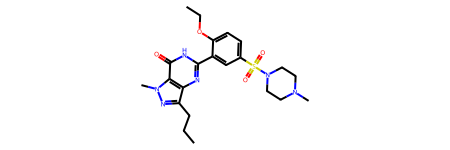

In [9]:

mol_object=Molecule.from_smiles("CCCc1nn(C)c2c1nc([nH]c2=O)-c1cc(ccc1OCC)S(=O)(=O)N1CCN(C)CC1")#("c1cc(O)ccc1-c1ccc(O)cc1")#c1cc(O)ccc1-c1ccc(O)cc1
mol_object




## Task-2
### Implement an algorithm (or modify the existing implementation) for generatinga canonical ranking of atoms according to the Cangen algorithm for Molecule objects

In [34]:
ranking=cangen_ranking(mol_object)

In [35]:
ranking

{<N>: 1, <CH1>: 2, <CH1>: 3, <CH1>: 4, <CH1>: 5, <CH1>: 6}

In [36]:



#SmilesMaker().getSimpleSmiles(mol_object,ranking)# same as the lower part
SmilesMaker().getSimpleSmiles(mol_object,cangen_ranking(mol_object))

'n1ccccc1'

In [37]:
m=Chem.MolFromSmiles("c1ncccc1")# from rdkit
SmilesMaker().getSimpleSmiles(mol_object,cangen_ranking(mol_object))

'n1ccccc1'

## Task 3 and 4

In [38]:
def load_smi(filename):
    with open(filename, 'r') as f:
        #content = f.read().split()[1:]
        content=f.readlines()
    return content

In [39]:
list_of_smiles=load_smi('zinc-ns.smi')


In [40]:
reduced_smiles = [smile for smile in list_of_smiles[1:1001]]# first onethousand




In [41]:
correct = 0
for smile in reduced_smiles:
    mol = Molecule.from_smiles(smile)
    #x=SmilesMaker().getSimpleSmiles(mol,cangen_ranking(mol))
    #x=mol.to_simple_smiles()
    x=mol.to_randomized_smiles()
    y=Chem.MolFromSmiles(x)
    #if y is None:
    #    print("Bad Smiles:",x,"   orig:",smile)
    y=Chem.MolToSmiles(y) if y else "BAD"
    if smile.split()[0]!=y:
        print("Unidentical Smiles:",x,"   orig:",smile,"y:",y)
    else:
        correct +=1
        
print(f"{correct} correct out of {len(reduced_smiles)}")

1000 correct out of 1000


In [42]:
mol.to_randomized_smiles()

'C1=CC23C(C(=O)NC(C)(C)C)N(C(CC)(C)C)C(=O)C2C(C1(C)O3)C(Nc1c(cccc1)F)=O'

In [43]:
mol.to_simple_smiles()

'O=C(Nc1ccccc1F)C1C2C(=O)N(C(C(=O)NC(C)(C)C)C22OC1(C)C=C2)C(C)(C)CC'

# PART 2  -   Parsing Smiles
## Task 1

In [44]:
#from_simple_smiles(reduced_smiles)

In [45]:
#c1ccc(c(c1)C2=NC(C(=O)Nc3c2cc(cc3)Cl)O)Cl

In [46]:
s="c1ccc(c(c1)C2=NC(C(=O)Nc3c2cc(cc3)Cl)O)Cl[nH]"
s="C(N)(O)"

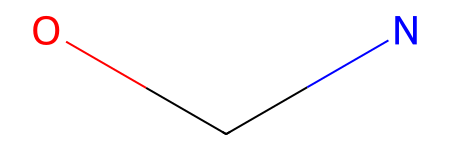

In [47]:
SmilesMaker().from_simple_smiles(s)

##  Task - 2

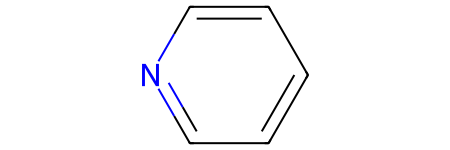

In [48]:
mol_object=SmilesMaker().from_simple_smiles("c1ncccc1")
mol_object

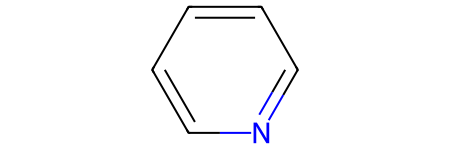

In [49]:
rdkit_obb=Molecule.from_smiles("c1ncccc1")
rdkit_ob=rdkit_obb.to_rdkit()
rdkit_ob

In [50]:
# trial comparing the smiles from the my_chem and from the rdkit, for the above given molecule
sm.getSimpleSmiles(mol_object)==rdkit_obb.to_smiles()#Chem.MolToSmiles(rdkit_ob)

True

In [51]:
sm.getSimpleSmiles(mol_object)==Chem.MolToSmiles(rdkit_ob)

True

In [52]:
# the above bool, flactuate between True and False, when I run them like 2 to 4 times.

In [53]:
mol_object.to_smiles()

'c1ccncc1'

In [54]:
sm.getSimpleSmiles(mol_object)

'c1ccncc1'

In [55]:
# Read the zinc-ns.smi file and extract the SMILES strings
with open('zinc-ns.smi') as f:
    smiles_list_ = [line.strip().split()[0] for line in f]
smiles_list=smiles_list_[2:1001]



In [71]:

# Initialize counters for correct and incorrect SMILES strings
correct_count = 0
incorrect_count = 0

# Loop through the s strings and check their correctness
for s in smiles_list:
    # Construct a molecule object using the from_simple_smiles method
    #print(s)
    molecule = SmilesMaker().from_simple_smiles(s)

    # Convert the molecule object into an RDKit-based canonical SMILES string
    rdkit_smiles = Chem.MolToSmiles(molecule.to_rdkit())
    #rdkit_smiles=molecule.to_smiles()

    # Compare the RDKit-based canonical SMILES string with the original SMILES string
    if s == rdkit_smiles:
        correct_count += 1
    else:
        print(rdkit_smiles)
        print(s)
        #break
        incorrect_count += 1

# Print the results
print(f'Number of correct SMILES strings: {correct_count}')
print(f'Number of incorrect SMILES strings: {incorrect_count}')

COCCCN(C)C(=O)Nc1cccc(Cc2ccccc2)c1
COCCCN(C)C(=O)Nc1ccc2c(c1)Cc1ccccc1-2
CCOC(=O)CCC(=O)N1CCN(C(=O)c2cnn(-c3ccccc3)c(=O)ccn(C(C)C)c2)CC1
CCOC(=O)CCC(=O)N1CCN(C(=O)c2cn(C(C)C)cc3c(=O)n(-c4ccccc4)nc2-3)CC1
COC(=O)c1cc2c(=O)nc(C(c3ccccc3)n3cncn3)cc2nc1C
COC(=O)c1cc2c(=O)n3c(cc2nc1C)C(c1ccccc1)n1ncnc1-3
Number of correct SMILES strings: 996
Number of incorrect SMILES strings: 3
